# THE EYE-BLINK DETECTION MODULE WITH EEG SIGNAL:-


In this module we are taking the user input using the EEG signal processing.
We are using three different algorithms namely, Convolutional Neural Network,
Long short term memory and an ensemble algorithm which combines former two methods

# The List of Libraries Used:-

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Conv1D
from keras.layers import Flatten,MaxPooling1D,AveragePooling1D,RepeatVector
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from numpy import newaxis
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix,plot_precision_recall_curve

# THIS LIBRARIES ARE FOR COLLECTING DATA FROM THE MUSE S
import matplotlib.pyplot as plt  # Module used for plotting
from pylsl import StreamInlet, resolve_byprop  # Module to receive EEG data
import time
from mne.io import RawArray
import mne
import matplotlib

# Collecting The Training Data:-

In [2]:
df = pd.read_csv('Eyeblinkdata.csv') #The training data set
tempdf=df
df

timestamps      TP9       AF7      AF8     TP10
0      1660049417  -14.160   -35.645  -37.598  -17.090
1      1660049417  -26.855   -56.152  -52.734  -34.668
2      1660049417  -29.297   -35.645  -33.691  -28.320
3      1660049417  -26.367   -14.648  -26.367  -19.531
4      1660049417  -40.039   -57.129  -34.668  -25.879
...           ...      ...       ...      ...      ...
49423  1660569871 -871.582  -539.062  164.062 -182.617
49424  1660569871 -917.969 -1000.000   63.965 -315.918
49425  1660569871  268.555  -294.922 -448.730  -49.316
49426  1660569871 -946.777  -991.699 -561.523  215.820
49427  1660569871  390.137   835.449 -607.910  177.734

[49428 rows x 5 columns]

# Data Preprocessing:-

In [3]:
print(df.isnull().sum()) # Here we are checking for the null value and we found no null value is there
max(df['AF8'])

timestamps    0
TP9           0
AF7           0
AF8           0
TP10          0
dtype: int64


994.629

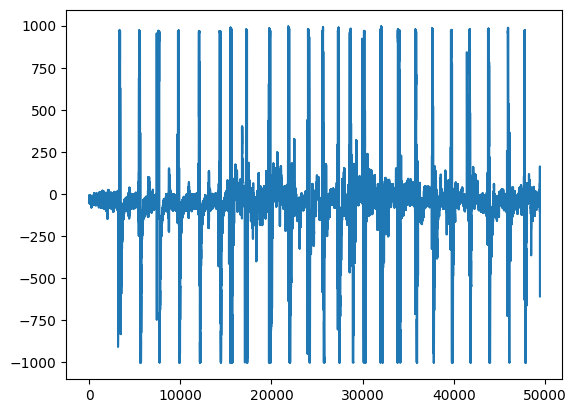

In [4]:
# plot a line chart
plt.plot(df['AF8'])
plt.show()


In [5]:
# We are normalising the data using minmax scalar
scaler=preprocessing.MinMaxScaler()
u=scaler.fit_transform(df['AF8'].values.reshape(-1,1))
u

array([[0.48249675],
       [0.47490837],
       [0.48445551],
       ...,
       [0.27637721],
       [0.21982885],
       [0.1965729 ]])

In [6]:
tempdf['AF8']=u


In [7]:
tempdf['AF8'] # This is how the data looks after normalisation

0        0.482497
1        0.474908
2        0.484456
3        0.488127
4        0.483966
           ...   
49423    0.583598
49424    0.533415
49425    0.276377
49426    0.219829
49427    0.196573
Name: AF8, Length: 49428, dtype: float64

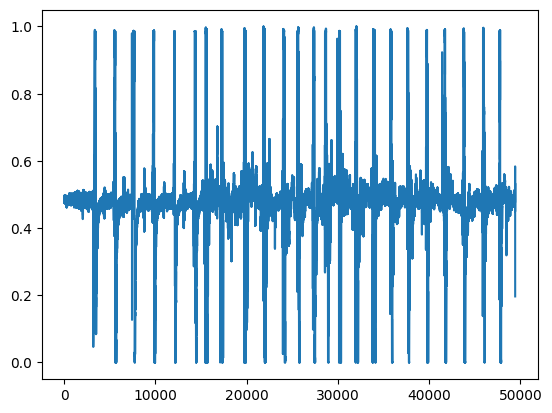

In [9]:

# plot a line chart
plt.plot(tempdf['AF8'])
plt.show()
# Here we can see all the data has scaled down to 0 to 1 and the negative values have been reduce withut changing any pattern
# of the original Data.


In [10]:
tempdf

timestamps      TP9       AF7       AF8     TP10
0      1660049417  -14.160   -35.645  0.482497  -17.090
1      1660049417  -26.855   -56.152  0.474908  -34.668
2      1660049417  -29.297   -35.645  0.484456  -28.320
3      1660049417  -26.367   -14.648  0.488127  -19.531
4      1660049417  -40.039   -57.129  0.483966  -25.879
...           ...      ...       ...       ...      ...
49423  1660569871 -871.582  -539.062  0.583598 -182.617
49424  1660569871 -917.969 -1000.000  0.533415 -315.918
49425  1660569871  268.555  -294.922  0.276377  -49.316
49426  1660569871 -946.777  -991.699  0.219829  215.820
49427  1660569871  390.137   835.449  0.196573  177.734

[49428 rows x 5 columns]

# Sampling the data two 128 features

In [11]:
templ=[]
for i in range(0,len(tempdf),128):
    val=[]
    templ.append(list(tempdf.iloc[i:i+128,3]))

In [12]:
templ

[[0.4824967450087209,
  0.4749083664180156,
  0.4844555052593741,
  0.4881273660415045,
  0.48396568986011934,
  0.4847001622858186,
  0.4815176155565772,
  0.4829865604079756,
  0.4829865604079756,
  0.48323121743442016,
  0.4847001622858186,
  0.4824967450087209,
  0.47564233749734913,
  0.4817627739293874,
  0.4851894763387076,
  0.4812729585301327,
  0.47564233749734913,
  0.47711128234874756,
  0.4856792917379623,
  0.48788270901506,
  0.47564233749734913,
  0.4817627739293874,
  0.4851894763387076,
  0.4812729585301327,
  0.47564233749734913,
  0.47711128234874756,
  0.4856792917379623,
  0.48788270901506,
  0.47564233749734913,
  0.4817627739293874,
  0.4851894763387076,
  0.4812729585301327,
  0.47564233749734913,
  0.47711128234874756,
  0.4856792917379623,
  0.48788270901506,
  0.48714823658936074,
  0.48641376416366155,
  0.4849448193122631,
  0.4829865604079756,
  0.48739289361580523,
  0.4954710876057653,
  0.48984096791934745,
  0.47980401367873426,
  0.4793146996258452,


In [13]:
templist=templ

# Here we are Implementing the novel 1.5 average window technique to label the unlabelled data

In [14]:
templist
count=0
mainmax=0
for i in range(len(templist)):
 
    print(i,"--""Max",max(templist[i]))
    print("average",sum(templist[i])/len(templist[i]))
    print("diff",max(templist[i])-sum(templist[i])/len(templist[i]))
    print("----------------------")
    if max(templist[i])-sum(templist[i])/len(templist[i]) > (sum(templist[i])/len(templist[i]))/2 :
        count=count+1
print(count)

0 --Max 0.49840897730856215
average 0.4843577583851434
diff 0.014051218923418762
----------------------
1 --Max 0.49840897730856215
average 0.48552246041118474
diff 0.012886516897377409
----------------------
2 --Max 0.49302301330222315
average 0.4792896714752468
diff 0.01373334182697633
----------------------
3 --Max 0.49840897730856215
average 0.4845623899544731
diff 0.013846587354089057
----------------------
4 --Max 0.5037944399685356
average 0.48933976255734773
diff 0.014454677411187833
----------------------
5 --Max 0.5011017086385489
average 0.48725709141900586
diff 0.013844617219542998
----------------------
6 --Max 0.5037944399685356
average 0.48728962801478387
diff 0.016504811953751697
----------------------
7 --Max 0.5018361810642481
average 0.4838528360098543
diff 0.017983345054393807
----------------------
8 --Max 0.5062425142720777
average 0.4840383694160668
diff 0.022204144856010855
----------------------
9 --Max 0.5074663007506659
average 0.4890873111616244
diff 0.01837

In [15]:
dataval=[]
blink=[]
for i in range(len(templist)):
    val=[]
   
    print(i,"--""Max",max(templist[i]))
    print("average",sum(templist[i])/len(templist[i]))
    print("diff",max(templist[i])-sum(templist[i])/len(templist[i]))
    diff=max(templist[i])-sum(templist[i])/len(templist[i])
    
    if diff >= (sum(templist[i])/len(templist[i]))/2:
        blink.append(1)
        
    else:
        blink.append(0)
   
   
    print("----------------------")

0 --Max 0.49840897730856215
average 0.4843577583851434
diff 0.014051218923418762
----------------------
1 --Max 0.49840897730856215
average 0.48552246041118474
diff 0.012886516897377409
----------------------
2 --Max 0.49302301330222315
average 0.4792896714752468
diff 0.01373334182697633
----------------------
3 --Max 0.49840897730856215
average 0.4845623899544731
diff 0.013846587354089057
----------------------
4 --Max 0.5037944399685356
average 0.48933976255734773
diff 0.014454677411187833
----------------------
5 --Max 0.5011017086385489
average 0.48725709141900586
diff 0.013844617219542998
----------------------
6 --Max 0.5037944399685356
average 0.48728962801478387
diff 0.016504811953751697
----------------------
7 --Max 0.5018361810642481
average 0.4838528360098543
diff 0.017983345054393807
----------------------
8 --Max 0.5062425142720777
average 0.4840383694160668
diff 0.022204144856010855
----------------------
9 --Max 0.5074663007506659
average 0.4890873111616244
diff 0.01837

In [16]:
t=templist
b=blink

In [17]:
count=0
for i in range(len(blink)):
    if blink[i]== 0 and count < 6:
        count=count+1
        b[i]=blink[i]
        t[i]=templist[i]
    if blink[i]==1.0 and count >= 6:
        b[i]=blink[i]
        t[i]=templist[i]
        
        
    

In [18]:
templist=t
blink=b

In [19]:
len(templist)

387

In [20]:
len(blink)

387

In [22]:
templist[:len(templist)-1]



[[0.4824967450087209,
  0.4749083664180156,
  0.4844555052593741,
  0.4881273660415045,
  0.48396568986011934,
  0.4847001622858186,
  0.4815176155565772,
  0.4829865604079756,
  0.4829865604079756,
  0.48323121743442016,
  0.4847001622858186,
  0.4824967450087209,
  0.47564233749734913,
  0.4817627739293874,
  0.4851894763387076,
  0.4812729585301327,
  0.47564233749734913,
  0.47711128234874756,
  0.4856792917379623,
  0.48788270901506,
  0.47564233749734913,
  0.4817627739293874,
  0.4851894763387076,
  0.4812729585301327,
  0.47564233749734913,
  0.47711128234874756,
  0.4856792917379623,
  0.48788270901506,
  0.47564233749734913,
  0.4817627739293874,
  0.4851894763387076,
  0.4812729585301327,
  0.47564233749734913,
  0.47711128234874756,
  0.4856792917379623,
  0.48788270901506,
  0.48714823658936074,
  0.48641376416366155,
  0.4849448193122631,
  0.4829865604079756,
  0.48739289361580523,
  0.4954710876057653,
  0.48984096791934745,
  0.47980401367873426,
  0.4793146996258452,


# Now we are splitting the Training Data train and validation set:-

In [23]:

X_train,X_test,y_train,y_test = train_test_split(np.array(templist[:len(templist)-1]),np.array(blink[:len(blink)-1]),test_size = 0.2,shuffle=True,stratify=np.array(blink[:len(blink)-1]))

In [24]:
y_train


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [25]:
X_train

array([[0.47074669, 0.47246029, 0.46927775, ..., 0.52484698, 0.46682967,
        0.42521441],
       [0.12166473, 0.10722144, 0.06634016, ..., 0.53855579, 0.541983  ,
        0.53170138],
       [0.28812727, 0.31676868, 0.32533669, ..., 0.45728253, 0.43990186,
        0.41689106],
       ...,
       [0.48225209, 0.48298656, 0.48665842, ..., 0.55642578, 0.56083211,
        0.54981653],
       [0.        , 0.        , 0.        , ..., 0.38384331, 0.39608318,
        0.41468764],
       [0.        , 0.        , 0.        , ..., 0.29033068, 0.27955926,
        0.27270485]])

In [26]:
# Here are reshaping the data to fit it to the models

In [27]:
X_train = X_train[:,:,newaxis]

In [28]:
X_test = X_test[:,:,newaxis]

In [30]:
X_train.shape

(308, 128, 1)

# LSTM:

In [132]:
modellstm = Sequential()
modellstm.add(LSTM(16, input_shape=(128,1)))
modellstm.add(Dense(64, activation='relu'))
modellstm.add(Dense(16, activation='relu'))
modellstm.add(Dense(64, activation='relu'))
modellstm.add(Dense(2, activation='softmax'))

In [133]:
modellstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 16)                1152      
                                                                 
 dense_42 (Dense)            (None, 64)                1088      
                                                                 
 dense_43 (Dense)            (None, 16)                1040      
                                                                 
 dense_44 (Dense)            (None, 64)                1088      
                                                                 
 dense_45 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,498
Trainable params: 4,498
Non-trainable params: 0
_________________________________________________________________


In [134]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.002)


In [135]:
modellstm.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy'
                  ,
              metrics=['Accuracy'])

In [136]:
history=modellstm.fit(X_train,y_train,epochs=100,validation_data =(X_test,y_test), batch_size=50,shuffle=True)

Epoch 1/100
7/7 [==============================] - 2s 98ms/step - loss: 0.6202 - Accuracy: 0.8799 - val_loss: 0.5001 - val_Accuracy: 0.8846
Epoch 2/100
7/7 [==============================] - 0s 30ms/step - loss: 0.4234 - Accuracy: 0.8799 - val_loss: 0.3315 - val_Accuracy: 0.8846
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 0.3501 - Accuracy: 0.8799 - val_loss: 0.3372 - val_Accuracy: 0.8846
Epoch 4/100
7/7 [==============================] - 0s 33ms/step - loss: 0.3479 - Accuracy: 0.8799 - val_loss: 0.3355 - val_Accuracy: 0.8846
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 0.3480 - Accuracy: 0.8799 - val_loss: 0.3354 - val_Accuracy: 0.8846
Epoch 6/100
7/7 [==============================] - 0s 31ms/step - loss: 0.3426 - Accuracy: 0.8799 - val_loss: 0.3253 - val_Accuracy: 0.8846
Epoch 7/100
7/7 [==============================] - 0s 30ms/step - loss: 0.3314 - Accuracy: 0.8799 - val_loss: 0.3167 - val_Accuracy: 0.8846
Epoch 8/100
7/7 [===

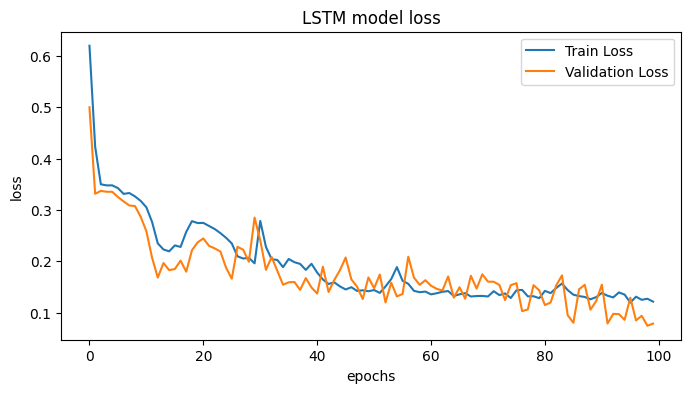

In [137]:
# Plotting the train vs. validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

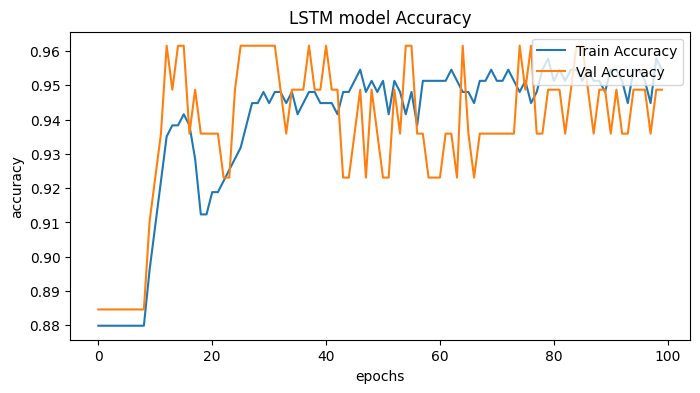

In [138]:
# Plotting the train vs. validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Val Accuracy')
plt.title('LSTM model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [139]:
predlstm=modellstm.predict(np.array(X_test))


3/3 [==============================] - 0s 11ms/step


In [140]:
predlstm

array([[9.86034751e-01, 1.39652016e-02],
       [9.91128325e-01, 8.87165684e-03],
       [9.92710114e-01, 7.28985015e-03],
       [9.93346691e-01, 6.65334193e-03],
       [9.86506820e-01, 1.34931980e-02],
       [9.91878629e-01, 8.12138245e-03],
       [9.82231677e-01, 1.77683532e-02],
       [9.80891883e-01, 1.91081408e-02],
       [7.17503135e-04, 9.99282539e-01],
       [9.72383201e-01, 2.76167393e-02],
       [9.81630743e-01, 1.83693022e-02],
       [8.00191820e-01, 1.99808195e-01],
       [9.87128019e-01, 1.28720105e-02],
       [9.93448436e-01, 6.55158050e-03],
       [9.90533113e-01, 9.46693309e-03],
       [9.87294853e-01, 1.27051529e-02],
       [9.87885296e-01, 1.21147363e-02],
       [9.90274251e-01, 9.72572900e-03],
       [3.72919947e-01, 6.27080083e-01],
       [9.91475940e-01, 8.52407608e-03],
       [3.68739992e-01, 6.31260037e-01],
       [9.88464952e-01, 1.15350252e-02],
       [9.87842798e-01, 1.21572455e-02],
       [9.81911898e-01, 1.80881415e-02],
       [9.905468

In [141]:
pred_ylstm=[]
for i in range(len(predlstm)):
    pred_ylstm.append(np.argmax(predlstm[i]))
    print(np.argmax(predlstm[i])==y_test[i],y_test[i])

True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 1
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
False 0
True 0
False 0
True 0
True 0
True 0
True 0
True 1
True 0
True 0
True 0
True 1
True 0
True 0
True 0
True 0
False 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
False 0
True 1
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 1
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 0
True 1
True 0
True 0
True 1
True 0
True 0
True 0
True 1
True 0
True 0
True 0
True 1
True 0
True 0


# CNN:

In [142]:
modelcnn = Sequential()

modelcnn.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(128,1)))


modelcnn.add(MaxPooling1D(pool_size=(2,), strides=1, padding='same'))

modelcnn.add(Dropout(0.1))
modelcnn.add(Conv1D(filters=4, kernel_size=4, activation='relu'))
modelcnn.add(Flatten())
modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dense(16, activation='relu'))
modelcnn.add(Dense(18, activation='relu'))
modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dense(2, activation='softmax'))

In [143]:
modelcnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 121, 16)           144       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 121, 16)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 121, 16)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 118, 4)            260       
                                                                 
 flatten_2 (Flatten)         (None, 472)               0         
                                                                 
 dense_46 (Dense)            (None, 32)                15136     
                                                     

In [145]:
opt = keras.optimizers.Adam(learning_rate=0.001)
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['Accuracy'])

In [146]:
history=modelcnn.fit(np.array((X_train)),np.array((y_train)),epochs=100,validation_data = (np.array((X_test)),np.array((y_test))), batch_size=50,shuffle=True)

Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.6918 - Accuracy: 0.6364 - val_loss: 0.6776 - val_Accuracy: 0.8846
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6692 - Accuracy: 0.8799 - val_loss: 0.6543 - val_Accuracy: 0.8846
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6318 - Accuracy: 0.8799 - val_loss: 0.5723 - val_Accuracy: 0.8846
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5166 - Accuracy: 0.8799 - val_loss: 0.3716 - val_Accuracy: 0.8846
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3600 - Accuracy: 0.8799 - val_loss: 0.2819 - val_Accuracy: 0.8846
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3501 - Accuracy: 0.8799 - val_loss: 0.2718 - val_Accuracy: 0.8846
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3151 - Accuracy: 0.8799 - val_loss: 0.2850 - val_Accuracy: 0.8846
Epoch 8/100
7/7 [===

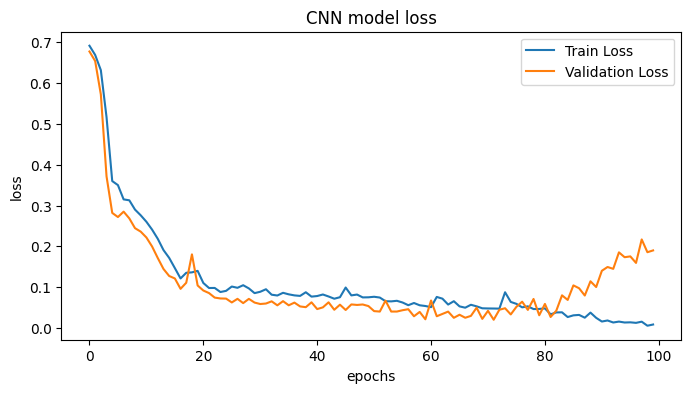

In [147]:
# Plotting the train vs. validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

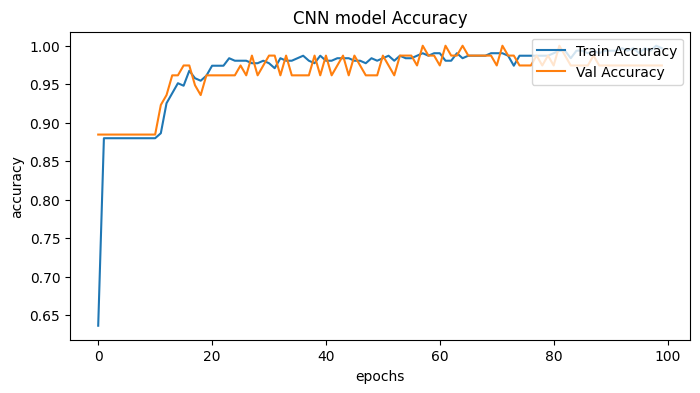

In [148]:
# Plotting the train vs. validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Val Accuracy')
plt.title('CNN model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [149]:
# pred=modelcnn.predict(np.array([X_test[0]]))
pred=modelcnn.predict(np.array(X_test))


3/3 [==============================] - 0s 8ms/step


In [150]:
pred_y=[]
for i in range(len(pred)):
    pred_y.append(np.argmax(pred[i]))
    
    print(np.argmax(pred[i])==y_test[i])


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# The ensemble Algorithm(CNN+LSTM):

In [151]:
modelensem = Sequential()
modelensem.add(Conv1D(filters=8, kernel_size=4, activation='relu', input_shape=(128,1)))
modelensem.add(MaxPooling1D(pool_size=(2,), strides=1, padding='same'))
modelensem.add(Dropout(0.1))
modelensem.add(Conv1D(filters=4, kernel_size=2, activation='relu'))
modelensem.add(Flatten())
modelensem.add(RepeatVector(1))
modelensem.add(LSTM(16))
modelensem.add(Dense(16, activation='relu'))
modelensem.add(Dense(8, activation='relu'))
modelensem.add(Dense(16, activation='relu'))
modelensem.add(Dense(4, activation='relu'))
modelensem.add(Dense(2, activation='softmax'))

In [152]:
modelensem.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 125, 8)            40        
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 125, 8)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 125, 8)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 124, 4)            68        
                                                                 
 flatten_3 (Flatten)         (None, 496)               0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 496)           0         
 or)                                                 

In [153]:
opt = keras.optimizers.Adam(learning_rate=0.001)
modelensem.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['Accuracy'])

In [154]:
history=modelensem.fit(np.array((X_train)),np.array((y_train)),epochs=100,validation_data = (np.array((X_test)),np.array((y_test))), batch_size=50,shuffle=True)

Epoch 1/100
7/7 [==============================] - 3s 87ms/step - loss: 0.6409 - Accuracy: 0.8799 - val_loss: 0.5339 - val_Accuracy: 0.8846
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4834 - Accuracy: 0.8799 - val_loss: 0.3710 - val_Accuracy: 0.8846
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3641 - Accuracy: 0.8799 - val_loss: 0.2990 - val_Accuracy: 0.8846
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.3390 - Accuracy: 0.8799 - val_loss: 0.2911 - val_Accuracy: 0.8846
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.3398 - Accuracy: 0.8799 - val_loss: 0.2849 - val_Accuracy: 0.8846
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.3325 - Accuracy: 0.8799 - val_loss: 0.2780 - val_Accuracy: 0.8846
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3222 - Accuracy: 0.8799 - val_loss: 0.2762 - val_Accuracy: 0.8846
Epoch 8/100
7/7 [=====

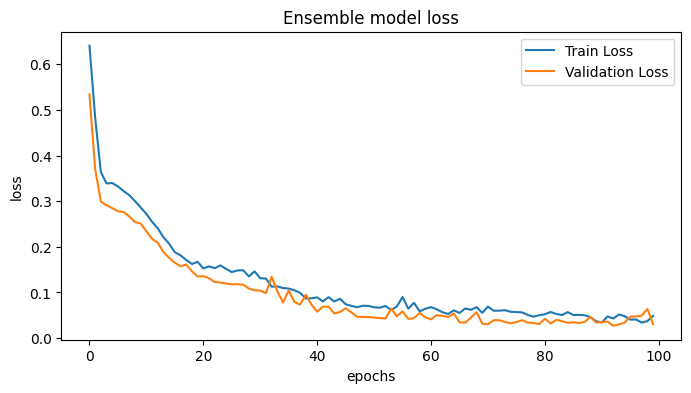

In [155]:
# Plotting the train vs. validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Ensemble model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

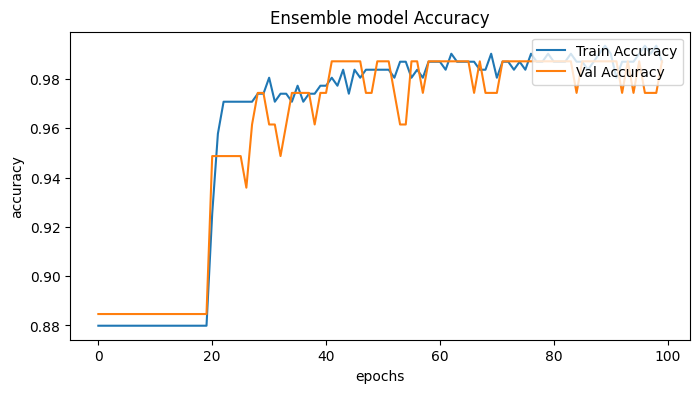

In [156]:
# Plotting the train vs. validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Val Accuracy')
plt.title('Ensemble model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [157]:
# pred=modelcnn.predict(np.array([X_test[0]]))
predensem=modelensem.predict(np.array(X_test))

3/3 [==============================] - 0s 2ms/step


In [158]:
pred_en=[]
for i in range(len(predensem)):
    pred_en.append(np.argmax(predensem[i]))
    
    print(np.argmax(predensem[i])==y_test[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Validating the Models with unknown Data Set

In [159]:
testdf = pd.read_csv('testdata.csv')

testdf

timestamps       TP9       AF7      AF8     TP10
0      1.660571e+09  -854.980  -816.895  -68.848   51.270
1      1.660571e+09   158.691   175.781  -74.219  -15.137
2      1.660571e+09 -1000.000 -1000.000  -50.781 -153.320
3      1.660571e+09  -733.398  -841.309  -32.715 -157.227
4      1.660571e+09   557.617   489.746  -29.297   -2.930
...             ...       ...       ...      ...      ...
35941  1.660571e+09 -1000.000 -1000.000  194.336  -92.773
35942  1.660571e+09  -718.262  -986.328  190.918 -104.004
35943  1.660571e+09   548.828   264.648  146.973   31.738
35944  1.660571e+09  -834.961  -785.645  140.625  130.371
35945  1.660571e+09   166.504   169.922  130.371   39.062

[35946 rows x 5 columns]

In [160]:
# Scalling the data in the same way we did for the training data
scaler=preprocessing.MinMaxScaler()
u=scaler.fit_transform(testdf['AF8'].values.reshape(-1,1))
u

array([[0.46970423],
       [0.46699492],
       [0.47881783],
       ...,
       [0.57857157],
       [0.57536942],
       [0.57019696]])

In [161]:
# Sampling the data in the same way we did for the training data
testcase=[]
for i in range(0,len(u),128):
    
    
    
    testcase.append(u[i:i+128])

In [162]:
len(testcase[0])

128

# Validation OF LSTM

In [163]:
testvallstm=[]
for i in range(len(testcase)-1):
    valpredlstm=modellstm.predict(np.array([testcase[i]]),verbose=False)
    testvallstm.append(np.argmax(valpredlstm))
    print(i,"----> ",np.argmax(valpredlstm))

0 ---->  1
1 ---->  1
2 ---->  1
3 ---->  1
4 ---->  0
5 ---->  0
6 ---->  0
7 ---->  0
8 ---->  0
9 ---->  0
10 ---->  0
11 ---->  0
12 ---->  0
13 ---->  0
14 ---->  0
15 ---->  0
16 ---->  0
17 ---->  0
18 ---->  0
19 ---->  0
20 ---->  0
21 ---->  0
22 ---->  1
23 ---->  1
24 ---->  1
25 ---->  0
26 ---->  0
27 ---->  0
28 ---->  0
29 ---->  0
30 ---->  0
31 ---->  0
32 ---->  0
33 ---->  0
34 ---->  0
35 ---->  0
36 ---->  0
37 ---->  0
38 ---->  0
39 ---->  0
40 ---->  0
41 ---->  0
42 ---->  0
43 ---->  0
44 ---->  0
45 ---->  0
46 ---->  1
47 ---->  0
48 ---->  0
49 ---->  0
50 ---->  0
51 ---->  0
52 ---->  0
53 ---->  0
54 ---->  0
55 ---->  0
56 ---->  0
57 ---->  0
58 ---->  0
59 ---->  0
60 ---->  0
61 ---->  0
62 ---->  0
63 ---->  0
64 ---->  0
65 ---->  1
66 ---->  0
67 ---->  0
68 ---->  0
69 ---->  0
70 ---->  0
71 ---->  0
72 ---->  0
73 ---->  0
74 ---->  0
75 ---->  0
76 ---->  0
77 ---->  0
78 ---->  0
79 ---->  0
80 ---->  0
81 ---->  0
82 ---->  0
83 ---->  1
84

# Validation of CNN

In [90]:
testvalcnn=[]
for i in range(len(testcase)-1):
    valpredcnn=modelcnn.predict(np.array([testcase[i]]),verbose=False)
    testvalcnn.append(np.argmax(valpredcnn))
    print(i,"----> ",np.argmax(valpredcnn))

0 ---->  1
1 ---->  0
2 ---->  0
3 ---->  1
4 ---->  1
5 ---->  0
6 ---->  0
7 ---->  0
8 ---->  0
9 ---->  0
10 ---->  0
11 ---->  0
12 ---->  0
13 ---->  0
14 ---->  0
15 ---->  0
16 ---->  0
17 ---->  0
18 ---->  0
19 ---->  0
20 ---->  0
21 ---->  1
22 ---->  1
23 ---->  0
24 ---->  1
25 ---->  0
26 ---->  0
27 ---->  0
28 ---->  0
29 ---->  0
30 ---->  0
31 ---->  0
32 ---->  0
33 ---->  0
34 ---->  0
35 ---->  0
36 ---->  0
37 ---->  0
38 ---->  0
39 ---->  0
40 ---->  0
41 ---->  0
42 ---->  0
43 ---->  1
44 ---->  0
45 ---->  0
46 ---->  1
47 ---->  0
48 ---->  1
49 ---->  0
50 ---->  0
51 ---->  0
52 ---->  0
53 ---->  0
54 ---->  0
55 ---->  0
56 ---->  0
57 ---->  0
58 ---->  0
59 ---->  0
60 ---->  0
61 ---->  0
62 ---->  0
63 ---->  0
64 ---->  0
65 ---->  1
66 ---->  0
67 ---->  0
68 ---->  0
69 ---->  0
70 ---->  0
71 ---->  0
72 ---->  0
73 ---->  0
74 ---->  0
75 ---->  0
76 ---->  0
77 ---->  0
78 ---->  0
79 ---->  0
80 ---->  0
81 ---->  0
82 ---->  0
83 ---->  1
84

# Validation of the Ensemble Algorithm:-

In [92]:
testvalensem=[]
for i in range(len(testcase)-1):
    valpredensem=modelensem.predict(np.array([testcase[i]]),verbose=False)
    testvalensem.append(np.argmax( valpredensem))
    print(i,"----> ",np.argmax( valpredensem))

0 ---->  1
1 ---->  1
2 ---->  0
3 ---->  1
4 ---->  0
5 ---->  0
6 ---->  0
7 ---->  0
8 ---->  0
9 ---->  0
10 ---->  0
11 ---->  0
12 ---->  0
13 ---->  0
14 ---->  0
15 ---->  0
16 ---->  0
17 ---->  0
18 ---->  0
19 ---->  0
20 ---->  0
21 ---->  1
22 ---->  1
23 ---->  1
24 ---->  1
25 ---->  0
26 ---->  0
27 ---->  0
28 ---->  0
29 ---->  0
30 ---->  0
31 ---->  0
32 ---->  0
33 ---->  0
34 ---->  0
35 ---->  0
36 ---->  0
37 ---->  0
38 ---->  0
39 ---->  0
40 ---->  0
41 ---->  0
42 ---->  0
43 ---->  1
44 ---->  0
45 ---->  0
46 ---->  1
47 ---->  0
48 ---->  0
49 ---->  0
50 ---->  0
51 ---->  0
52 ---->  0
53 ---->  0
54 ---->  0
55 ---->  0
56 ---->  0
57 ---->  0
58 ---->  0
59 ---->  0
60 ---->  0
61 ---->  0
62 ---->  1
63 ---->  0
64 ---->  0
65 ---->  1
66 ---->  0
67 ---->  0
68 ---->  0
69 ---->  0
70 ---->  0
71 ---->  0
72 ---->  0
73 ---->  0
74 ---->  0
75 ---->  0
76 ---->  0
77 ---->  0
78 ---->  0
79 ---->  0
80 ---->  0
81 ---->  0
82 ---->  0
83 ---->  0
84

In [164]:
x=np.arange(0.0, 140, 0.5)
x1=np.arange(0.0, 35946/256, 1/256)
len(x1)


35946

In [95]:
# plt.plot(x,testvallstm)

# plt.show()

In [165]:
len(testdf['AF8'])

35946

In [166]:
vallstm=[]
for i in testvallstm:
    vallstm.append(i*1000)
len(vallstm)

280

In [167]:
valcnn=[]
for i in testvalcnn:
    valcnn.append(i*1000)
len(valcnn)

280

In [168]:
valensem=[]
for i in testvalensem:
    valensem.append(i*1000)
len(valensem)

280

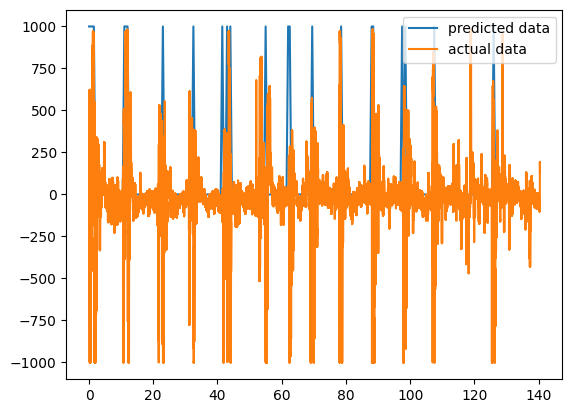

In [176]:
plt.plot(x,vallstm,label='predicted data')
plt.plot(x1,testdf['AF8'],label='actual data')
plt.legend(loc='upper right')
plt.show()

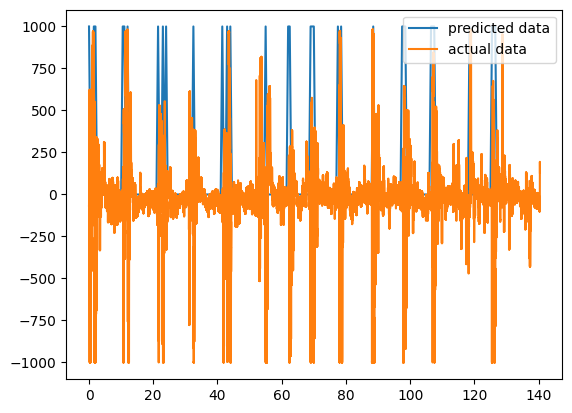

In [177]:
plt.plot(x,valcnn,label='predicted data')
plt.plot(x1,testdf['AF8'],label='actual data')
plt.legend(loc='upper right')
plt.show()

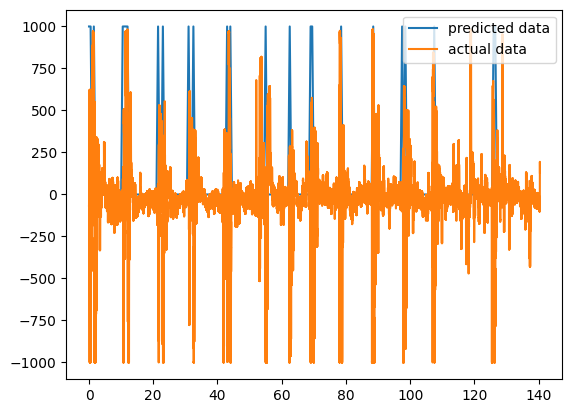

In [178]:
plt.plot(x,valensem,label='predicted data')
plt.plot(x1,testdf['AF8'],label='actual data')
plt.legend(loc='upper right')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.82      1.00      0.90         9

    accuracy                           0.97        78
   macro avg       0.91      0.99      0.94        78
weighted avg       0.98      0.97      0.98        78



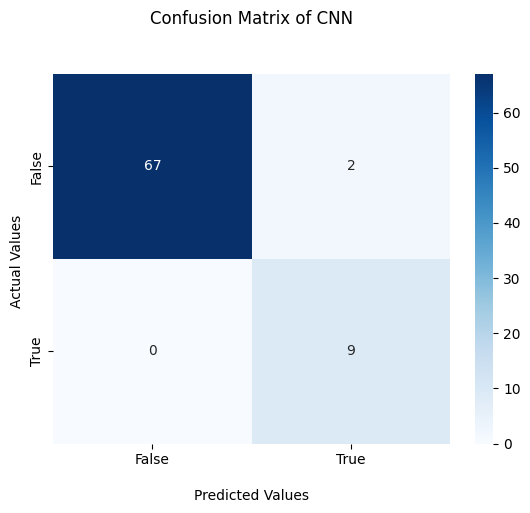

In [183]:
#For CNN
print(classification_report(y_test, pred_y))



import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test, pred_y), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix of CNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        69
           1       0.69      1.00      0.82         9

    accuracy                           0.95        78
   macro avg       0.85      0.97      0.89        78
weighted avg       0.96      0.95      0.95        78

[[65  4]
 [ 0  9]]


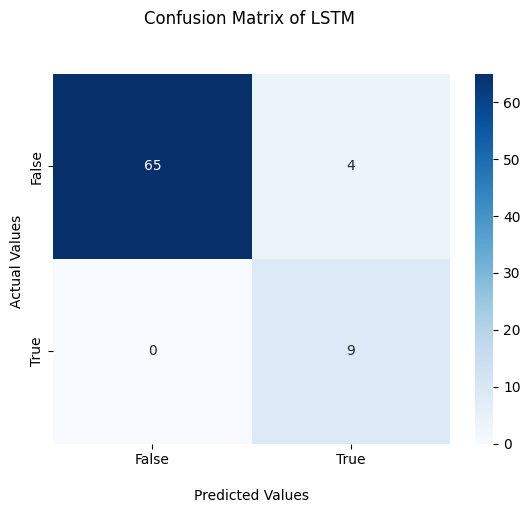

In [181]:
#For LSTM
print(classification_report(y_test, pred_ylstm))

print(confusion_matrix(y_test, pred_ylstm))


ax = sns.heatmap(confusion_matrix(y_test, pred_ylstm), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix of LSTM \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.90      1.00      0.95         9

    accuracy                           0.99        78
   macro avg       0.95      0.99      0.97        78
weighted avg       0.99      0.99      0.99        78

[[68  1]
 [ 0  9]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

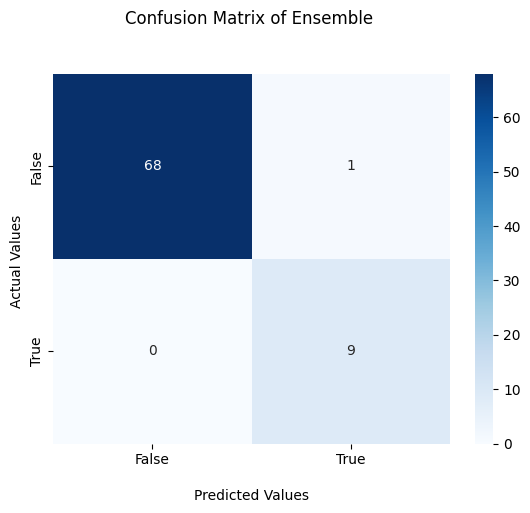

In [182]:
#For Ensemble
print(classification_report(y_test, pred_en))

print(confusion_matrix(y_test, pred_en))

ax = sns.heatmap(confusion_matrix(y_test, pred_en), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix of Ensemble \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Here We are comparing Our best Model Ensemble with the MNE RAW EOG detector:-

In [1]:

# info_sensor = mne.create_info(ch_names=['AF8'], sfreq=128, ch_types=['eog'])
# raw = RawArray([x[0][0:128]], info=info_sensor)
# eog_epochs = mne.preprocessing.create_eog_epochs(raw,verbose=False) 
# eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
# eog_epochs.plot_image(combine='mean')
# eog_epochs.average().plot_joint()

In [234]:
np.array(testcase[1]).shape
testcase[0].reshape(1,-1)
info_sensor = mne.create_info(ch_names=['AF8'], sfreq=128, ch_types=['eog'])
raw = RawArray(testcase[0].reshape(1,-1), info=info_sensor)
mne.preprocessing.find_eog_events(raw,thresh=5,filter_length=128)

Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
Using EOG channel: AF8
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 128 samples (1.000 sec)

Now detecting blinks and generating corresponding events
No significant peaks found
Number of EOG events detected: 0


C:\Users\subha\AppData\Local\Temp\ipykernel_5980\1439126188.py:5: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  mne.preprocessing.find_eog_events(raw,thresh=5,filter_length=128)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\1439126188.py:5: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  mne.preprocessing.find_eog_events(raw,thresh=5,filter_length=128)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([], shape=(0, 3), dtype=int64)

In [235]:
testvalmneRaw=[]


for i in range(len(testcase)-1):
    
    info_sensor = mne.create_info(ch_names=['AF8'], sfreq=128, ch_types=['eog'])
    raw = RawArray(testcase[i].reshape(1,-1), info=info_sensor)
    event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
    testvalmneRaw.append(len(event))
    print(i,"----> ",testvalmneRaw)

Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
0 ---->  [2]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
1 ---->  [2, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
2 ---->  [2, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
3 ---->  [2, 0, 0, 1]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
4 ---->  [2, 0, 0, 1, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
5 ---->  [2, 0, 0, 1, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
6 ---->  

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
21 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
22 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
23 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
24 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
25 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
Creating RawArray with float

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

Ready.
38 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
39 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
40 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
41 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =     

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
58 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
59 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
60 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
R

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
75 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
76 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
77 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
94 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
95 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
96 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

112 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
113 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
114 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
129 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
130 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
Creating

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
134 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
135 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
149 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
150 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
154 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
155 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
168 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
169 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

171 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
172 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
184 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
185 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenua

Ready.
190 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
191 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
202 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
203 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
208 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
209 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
219 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
220 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

Ready.
229 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
230 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
239 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
240 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

Ready.
246 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
247 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
256 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
257 ---->  [2, 0, 0, 1, 0, 0, 0,

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

264 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
265 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

    Range : 0 ... 127 =      0.000 ...     0.992 secs
Ready.
273 ---->  [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Creating RawArray with float64 data, n_channels=1, n_times=128
    Range : 0 ... 127 =      0.000 ...    

C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 1.50 Hz is only 14.46 dB. Increase filter_length for higher attenuation.
  event=mne.preprocessing.find_eog_events(raw,thresh=0.5,filter_length=128,verbose=False)
C:\Users\subha\AppData\Local\Temp\ipykernel_5980\434328891.py:8: RuntimeWarning: Attenuation at stop frequency 0.50 Hz is only 13.63 dB. Increase filter_length for higher attenua

In [236]:
testvalmneRaw

[2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [237]:
valmne=[]
for i in testvalmneRaw:
    valmne.append(i*1000)
len(valmne)
print(valmne)

[2000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


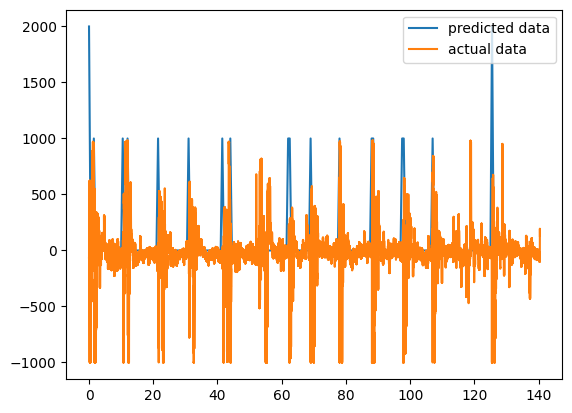

In [238]:
plt.plot(x,valmne,label='predicted data')
plt.plot(x1,testdf['AF8'],label='actual data')
plt.legend(loc='upper right')
plt.show()

# The Program to Read live DATA from the MUSE LSL

In [ ]:
#This Part Won't work without the MUSE S Head BAND



def dataprocess(eeg):
    scaler=preprocessing.MinMaxScaler()
   
    for i in range(len(eeg)):
        x.append(eeg[i][2])
#     print(x)
    if len(x) == 0:
        return [0.0,0.0]
    
    
    u=scaler.fit_transform(np.array(x).reshape(-1,1))
#     print("scaled---",u,max(u))
    return [u]

    

In [ ]:
blinks=[]



In [ ]:

BUFFER_LENGTH = 5

# Length of the epochs used to compute the FFT (in seconds)
EPOCH_LENGTH = 1

# Amount of overlap between two consecutive epochs (in seconds)
OVERLAP_LENGTH = 0.50

# Amount to 'shift' the start of each next consecutive epoch
SHIFT_LENGTH = EPOCH_LENGTH - OVERLAP_LENGTH

if __name__ == "__main__":

 print('Looking for an EEG stream...')
 streams = resolve_byprop('type', 'EEG', timeout=2)
 print(streams)
 if len(streams) == 0:
  raise RuntimeError('Can\'t find EEG stream.')
 print("Start acquiring data")
 inlet = StreamInlet(streams[0], max_chunklen=128)
 print(inlet)
 eeg_time_correction = inlet.time_correction()
 print(eeg_time_correction)
 info = inlet.info()
 print(info)
 description = info.desc()
 print(description)
 fs = int(info.nominal_srate())
 print(fs)
 
 try:
        
  while True:
    eeg_data, timestamp = inlet.pull_chunk(timeout=1, max_samples=int(SHIFT_LENGTH * fs))

  
    np_array=dataprocess(eeg_data)
    print("----",np_array)

    pred=modelcnn.predict(l)
    if pred > 0.0 :
        blinks.append(1)
   
  
    print('\n')
   #ch_data = np.array(eeg_data)[:, INDEX_CHANNEL]

 except KeyboardInterrupt:
  print('Closing!')


In [ ]:
blinks